In [9]:
import pandas as pd
import sqlite3 as lite
from NNClassifier import TrainedClassifier
import os.path
import numpy as np
import matplotlib.pyplot as plt
import feather
%matplotlib inline

Load the trained classifier:

In [18]:
training_data = 'NNClassifier/tmp/drug_mjr_2.621/training_data.npz'
trained_model = 'NNClassifier/tmp/drug_mjr_2.621'
column_of_interest = 'drug_major_class'

In [3]:
tc = TrainedClassifier(training_data,trained_model)

------------------------------
loading the translator
------------------------------
------------------------------
loading the args
------------------------------
------------------------------
initialization
------------------------------
------------------------------
loading the model
------------------------------


Next, lets' load our database of data scraped from google (which we plan to use to classify drugs).

In [11]:
#local database:
database = 'data/googDrugData.db'
druguse_file = 'data/drugnames_withclasses.feather'

In [14]:
with lite.connect(database) as con:
    df_goog = pd.read_sql('select Generic_Name, Drug_Class_Data_clean, url from goog_drug_class_data;',con)
#Do a bit of cleaning:
df_goog['Generic_Name'] = df_goog['Generic_Name'].apply(lambda x: x.strip())
df_goog['Generic_Name'] = df_goog['Generic_Name'].apply(lambda x: x.lower())
df_goog

,Generic_Name,Drug_Class_Data_clean,url
0,sulfacetamide sodium,\n\n sulfa antibiotics\n \n\n,https://www.goodrx.com/sulfacetamide-sulfur
1,sulfacetamide sodium,\n\n Other\n \n\n sulfa antibiotics\n \...,https://www.goodrx.com/sulfacetamide-sulfur
2,sulfacetamide sodium,\n\n sulfa antibiotics\n \n\n,http://www.goodrx.com/sulfacetamide/images
3,sulfacetamide sodium,\n\n Other\n \n\n sulfa antibiotics\n \...,http://www.goodrx.com/sulfacetamide/images
4,sulfacetamide sodium,\n\n sulfa antibiotic / corticosteroid combin...,https://www.goodrx.com/sulfacetamide-prednisol...
5,sulfacetamide sodium,\n\n Other\n \n\n sulfa antibiotic / cort...,https://www.goodrx.com/sulfacetamide-prednisol...
6,sulfacetamide sodium,\n\n sulfa antibiotics\n \n\n,http://www.goodrx.com/klaron/images
7,sulfacetamide sodium,\n\n Other\n \n\n sulfa antibiotics\n \...,http://www.goodrx.com/klaron/images
8,sulfacetamide sodium,\n\n Sulfonamide Antibacterial [EPC]\n \n,http://www.medschat.com/NDC/61314-701
9,sulfacetamide sodium,\n\n Sulfonamides [Chemical/Ingredient]\n \n,http://www.medschat.com/NDC/61314-701


Next, let's load the database of classified drugs, and check how accurate our classifier is:

In [12]:
if os.path.isfile(druguse_file):
    df_uses = feather.read_dataframe(druguse_file)
else:
    print("Run the D4D script to generate the database.")

Correlate the two databases:

In [19]:
df_uses_known = df_uses[df_uses[column_of_interest] != '0']

df = pd.merge(df_uses_known[['drugname_generic',column_of_interest]]
                      ,df_goog,
              left_on='drugname_generic',
              right_on='Generic_Name',
              how='inner').drop('Generic_Name',1).drop_duplicates(keep='first').reset_index(drop=True)
df

,drugname_generic,drug_major_class,Drug_Class_Data_clean,url
0,sulfacetamide sodium,0|DE000|OP000,\n\n sulfa antibiotics\n \n\n,https://www.goodrx.com/sulfacetamide-sulfur
1,sulfacetamide sodium,0|DE000|OP000,\n\n Other\n \n\n sulfa antibiotics\n \...,https://www.goodrx.com/sulfacetamide-sulfur
2,sulfacetamide sodium,0|DE000|OP000,\n\n sulfa antibiotics\n \n\n,http://www.goodrx.com/sulfacetamide/images
3,sulfacetamide sodium,0|DE000|OP000,\n\n Other\n \n\n sulfa antibiotics\n \...,http://www.goodrx.com/sulfacetamide/images
4,sulfacetamide sodium,0|DE000|OP000,\n\n sulfa antibiotic / corticosteroid combin...,https://www.goodrx.com/sulfacetamide-prednisol...
5,sulfacetamide sodium,0|DE000|OP000,\n\n Other\n \n\n sulfa antibiotic / cort...,https://www.goodrx.com/sulfacetamide-prednisol...
6,sulfacetamide sodium,0|DE000|OP000,\n\n sulfa antibiotics\n \n\n,http://www.goodrx.com/klaron/images
7,sulfacetamide sodium,0|DE000|OP000,\n\n Other\n \n\n sulfa antibiotics\n \...,http://www.goodrx.com/klaron/images
8,sulfacetamide sodium,0|DE000|OP000,\n\n Sulfonamide Antibacterial [EPC]\n \n,http://www.medschat.com/NDC/61314-701
9,sulfacetamide sodium,0|DE000|OP000,\n\n Sulfonamides [Chemical/Ingredient]\n \n,http://www.medschat.com/NDC/61314-701


In [20]:
df_testing = df[['drugname_generic',column_of_interest]].drop_duplicates(keep='first').reset_index(drop=True)
df_testing

,drugname_generic,drug_major_class
0,sulfacetamide sodium,0|DE000|OP000
1,guaifenesin/dm/pseudoephedrine,RE000
2,methoxsalen,DE000
3,antipyrine/benzocaine,NT000|OT000
4,abacavir sulfate,AM000
5,abacavir/lamivudine/zidovudine,AM000
6,aripiprazole,CN000
7,paclitaxel protein-bound,AN000
8,isotretinoin,DE000
9,fentanyl citrate,CN000


Run the classifier:

In [ ]:
threshold = 0.2
df_testing['Therapeutic_Classifier_Guess'] = ''
df_testing['Therapeutic_Classifier_Top_Guesses'] = ''
df_testing['Therapeutic_Classifier_Prob'] = 0.
checked_drugs = dict()
for i,drugname in enumerate(df_testing['drugname_generic']):
    if drugname not in checked_drugs:
        urls = df[df['drugname_generic'] == drugname]['url']
        agg_probs = dict()
        j = 0.
        for url in urls:
            descriptors = df[(df['drugname_generic'] == drugname) & (df['url'] == url)]['Drug_Class_Data_clean']
            if len(descriptors) > 0:
                j += 1.
                cur_agg_probs = tc.confidence_classification_aggregate(descriptors)
                for key in cur_agg_probs.keys():
                    if key in agg_probs:
                        agg_probs[key] = ((j-1)*agg_probs[key] + cur_agg_probs[key])/j
                    else:
                        agg_probs[key] = cur_agg_probs[key]
            #print(drugname,tc.top_classification_aggregate(descriptors))
        top_guess = max(agg_probs, key=agg_probs.get)
        top_guesses = '|'.join(sorted([key for key,val in agg_probs.items() if val >= threshold]))
        checked_drugs[drugname] = {'agg_probs':agg_probs,'top_guess':top_guess,'top_guesses':top_guesses,'prob':agg_probs[top_guess]}
    df_testing['Therapeutic_Classifier_Guess'].iloc[i] = checked_drugs[drugname]['top_guess']
    df_testing['Therapeutic_Classifier_Top_Guesses'].iloc[i] = checked_drugs[drugname]['top_guesses']
    df_testing['Therapeutic_Classifier_Prob'].iloc[i] = checked_drugs[drugname]['prob']
    print(drugname + " Correct: "+ df_testing[column_of_interest].iloc[i] +"\n"+
          "Guessed: "+
          df_testing['Therapeutic_Classifier_Guess'].iloc[i]+ " Prob: "+str(agg_probs[top_guess])+"\n"+
          "Top Guesses: "+
          df_testing['Therapeutic_Classifier_Top_Guesses'].iloc[i])
df_testing

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


sulfacetamide sodium Correct: 0|DE000|OP000
Guessed: CN000 Prob: 0.192588254809
Top Guesses: 
guaifenesin/dm/pseudoephedrine Correct: RE000
Guessed: CN000 Prob: 0.192588254809
Top Guesses: 
methoxsalen Correct: DE000
Guessed: CN000 Prob: 0.192588254809
Top Guesses: 
antipyrine/benzocaine Correct: NT000|OT000
Guessed: CN000 Prob: 0.192588254809
Top Guesses: 
abacavir sulfate Correct: AM000
Guessed: CN000 Prob: 0.192588254809
Top Guesses: 
abacavir/lamivudine/zidovudine Correct: AM000
Guessed: CN000 Prob: 0.192588254809
Top Guesses: 
aripiprazole Correct: CN000
Guessed: CN000 Prob: 0.192588254809
Top Guesses: 
paclitaxel protein-bound Correct: AN000
Guessed: CN000 Prob: 0.192588254809
Top Guesses: 
isotretinoin Correct: DE000
Guessed: CN000 Prob: 0.192588254809
Top Guesses: 
fentanyl citrate Correct: CN000
Guessed: CN000 Prob: 0.192588254809
Top Guesses: 
acamprosate calcium Correct: AD000
Guessed: CN000 Prob: 0.192588254809
Top Guesses: 
clindamycin phos/benzoyl perox Correct: 0|AM000|D

Check the accuracy, how often do we get one of the possible correct classifications?

In [23]:
correct = dict()
for drug in set(df_testing['drugname_generic']):
    df_tmp = df_testing[df_testing['drugname_generic']==drug]
    correct[drug] = (df_tmp['therapeutic'] == df_tmp['Therapeutic_Classifier_Guess']).sum()>0

In [27]:
mask = pd.Series([correct[drug] for drug in df_testing['drugname_generic']])

In [24]:
total_correct = 0
for drug,cor in correct.items():
    total_correct += cor
accuracy = total_correct/len(correct)
print('Accuracy: %f'%accuracy)

Accuracy: 0.695187


In [25]:
mask = (df_testing['therapeutic'] == df_testing['Therapeutic_Classifier_Guess'])
accuracy = mask.sum()/mask.shape
print('Accuracy: %f'%accuracy)

Accuracy: 0.528628


In [26]:
num_entries = dict()
for drug in df_testing[mask == False]['drugname_generic']:
    if drug not in num_entries:
        num_entries[drug] = (df_testing['drugname_generic'] == drug).sum()
total_entries = 0
for drug,num in num_entries.items():
    total_entries += num
total_entries/len(num_entries)

1.8043478260869565

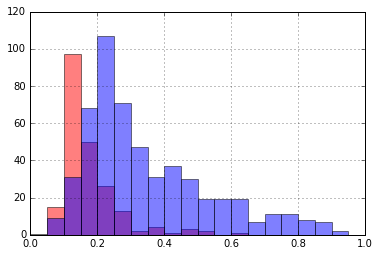

In [42]:
df_testing[(mask == False)]['Therapeutic_Classifier_Prob'].hist(color = 'red',alpha = 0.5, bins = np.arange(0,1,.05))
df_testing[(mask == True)]['Therapeutic_Classifier_Prob'].hist(color = 'blue',alpha = 0.5, bins = np.arange(0,1,.05))
plt.show()

In [44]:
df_testing[(mask == False) & (df_testing['Therapeutic_Classifier_Prob']>.15)]

,drugname_generic,anatomical,therapeutic,pharmacologic,Therapeutic_Classifier_Guess,Therapeutic_Classifier_Prob,Therapeutic_Classifier_Probs
7,ACETAZOLAMIDE,SENSORY ORGANS,OPHTHALMOLOGICALS,ANTIGLAUCOMA PREPARATIONS AND MIOTICS,ANTIEPILEPTICS,0.403323,0
13,ACITRETIN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR SYSTEMIC USE,ANTI-ACNE PREPARATIONS,0.232684,0
23,RIOCIGUAT,CARDIOVASCULAR SYSTEM,ANTIHYPERTENSIVES,OTHER ANTIHYPERTENSIVES,DIURETICS,0.295442,0
44,ALBENDAZOLE,"ANTIPARASITIC PRODUCTS, INSECTICIDES AND REPEL...",ANTHELMINTICS,ANTINEMATODAL AGENTS,ANTINEOPLASTIC AGENTS,0.168159,0
48,SALICYLIC ACID,DERMATOLOGICALS,ANTIFUNGALS FOR DERMATOLOGICAL USE,ANTIFUNGALS FOR TOPICAL USE,UROLOGICALS,0.248634,0
49,SALICYLIC ACID,SENSORY ORGANS,OPHTHALMOLOGICALS,ANTIINFLAMMATORY AGENTS,UROLOGICALS,0.248634,0
55,ALPROSTADIL,CARDIOVASCULAR SYSTEM,CARDIAC THERAPY,OTHER CARDIAC PREPARATIONS,DIURETICS,0.219290,0
56,ALPROSTADIL,GENITO URINARY SYSTEM AND SEX HORMONES,UROLOGICALS,UROLOGICALS,DIURETICS,0.219290,0
66,AMINOPHYLLINE,RESPIRATORY SYSTEM,DRUGS FOR OBSTRUCTIVE AIRWAY DISEASES,OTHER SYSTEMIC DRUGS FOR OBSTRUCTIVE AIRWAY DI...,ANTINEOPLASTIC AGENTS,0.155360,0
74,AMYL NITRITE,VARIOUS,ALL OTHER THERAPEUTIC PRODUCTS,ALL OTHER THERAPEUTIC PRODUCTS,UROLOGICALS,0.485699,0
